## Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing cleaned dataset.

In [2]:
df = pd.read_csv('cubic_zirconia_cleaned.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


- cut, color, clarity needs to be converted.

## Feature Encoding.

In [4]:
# Unique value for these three features
print('Unique values for diamond cut :', df['cut'].unique())
print('Unique values for diamond color :', df['color'].unique())
print('Unique values for diamond clarity :', df['clarity'].unique())

Unique values for diamond cut : ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Unique values for diamond color : ['E' 'G' 'F' 'D' 'H' 'J' 'I']
Unique values for diamond clarity : ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


### Cuts.
- Cut grading Diamonds are graded into the following cuts:(best to worst)

   Ideal > Premium > Very Good > Good > Fair

In [5]:
# Labeling cut based on given list 
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
df['cut'] = df['cut'].map(cut_map)

### Color

Diamonds are valued by how closely they come to being colorless. The less color, the higher their value.

- D, E, F: are colorless

- G, H, I, J: are near-colorless

- D > E > F > G > H > I > J.

In [6]:
# Labeling color based on given list 
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
df['color'] = df['color'].map(color_map)

### Clarity

- Clarity of Diamonds can be graded in the following Grades:(best to worst)

  IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1

In [7]:
# Labeling clarity based on given list
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
df['clarity'] = df['clarity'].map(clarity_map)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26933 entries, 0 to 26932
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.1 MB


## Outlier treatment

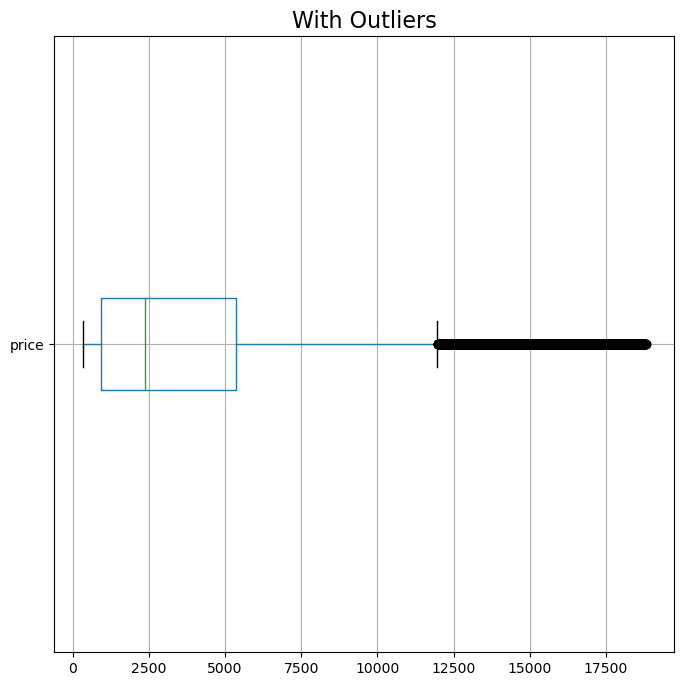

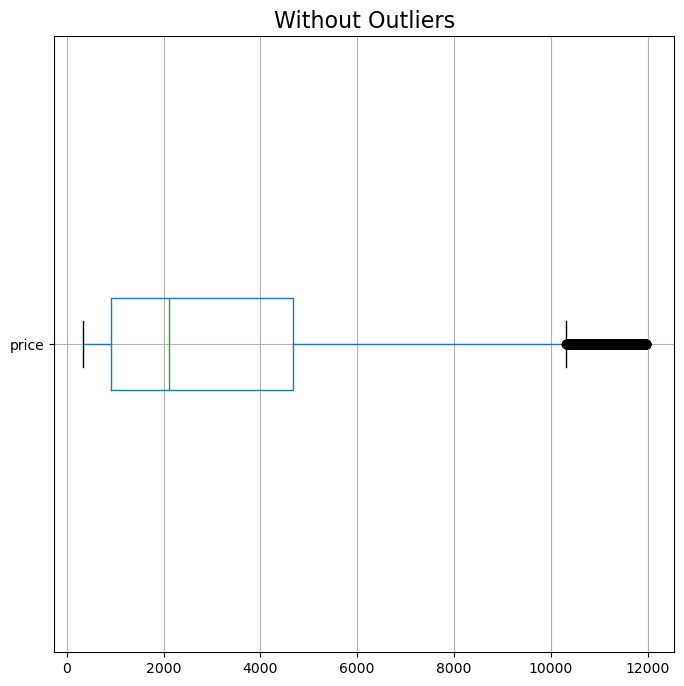

In [10]:
# Construct a box plot to check for outliers before removal
plt.figure(figsize=(8, 8))
df.boxplot(column='price', vert=False)
plt.title('With Outliers', fontsize=16)
plt.show()

# Outlier treatment with IQR method.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply outlier removal to the 'price' column
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Construct a box plot after removing outliers
plt.figure(figsize=(8, 8))
df.boxplot(column='price', vert=False)
plt.title('Without Outliers', fontsize=16)
plt.show()

## Model Building

### Idependent/Dependent feature.

In [11]:
x = df.drop('price',axis=1)
y = df['price']

### train/test split

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 , random_state=42)

In [13]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((18866, 9), (6289, 9), (18866,), (6289,))

### Multiccoliniarity check.

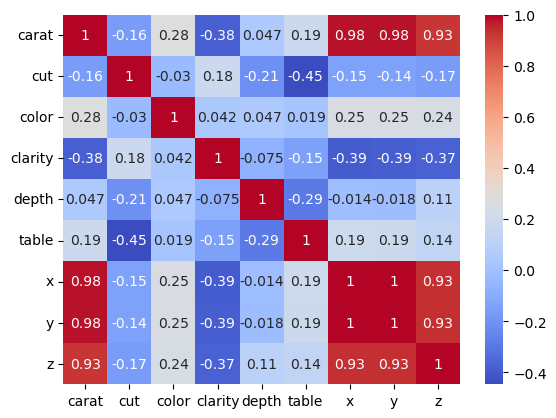

In [14]:
correlation_matrix = x_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
##threshold---> set by Domain expert.
corr_features=correlation(x_train,0.85)
corr_features

{'x', 'y', 'z'}

We have to remove length(x), breadth(y) and  Width(z).

In [17]:
## drop features when correlation is more than 0.85 
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((18866, 6), (6289, 6))

### Feature scaling or standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4348\4063875231.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

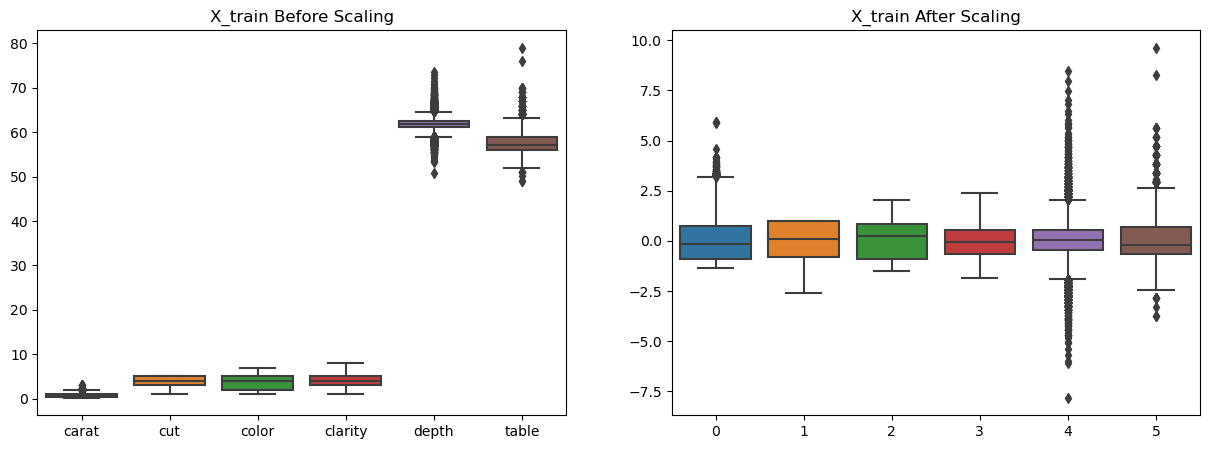

In [19]:
## Box Plots To understand Effect Of Standard Scaler
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')

In [20]:
## Function to evaluate , plot model and store metrics.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a dictionary to store model results
model_results = {}

def evaluate_and_plot_model(model, model_name, x_train, y_train, x_test, y_test):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate the adjusted R-squared
    n = len(y_test)
    p = x_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Store the model results in the dictionary
    model_results[model_name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
        'Adjusted R-squared': adj_r2
    }

    # Print the metrics
    print(f'{model_name} Results:')
    print('Mean squared error:', mse)
    print('Mean absolute error:', mae)
    print('R-squared:', r2)
    print('Adjusted R-squared:', adj_r2)

    # Scatter plot with a best-fit line
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted ({model_name})')
    plt.show()


### Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

LinearRegression Results:
Mean squared error: 745004.7886722399
Mean absolute error: 610.4969168247734
R-squared: 0.903225934680946
Adjusted R-squared: 0.9031335048191322


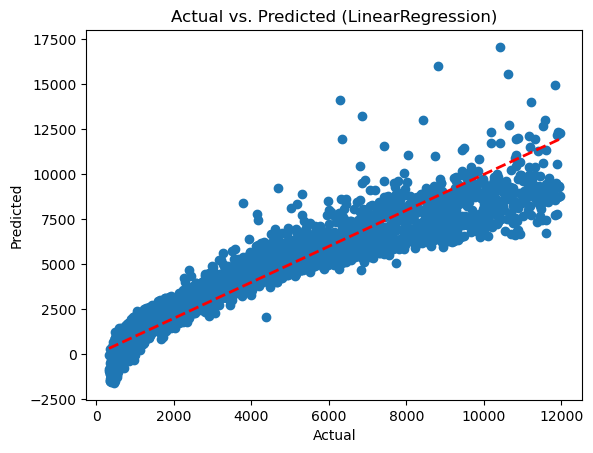

In [22]:
evaluate_and_plot_model(model1,'LinearRegression', x_train_scaled, y_train, x_test_scaled, y_test)

### Ridge regression.

Ridge Results:
Mean squared error: 745001.3794799516
Mean absolute error: 610.4632092874938
R-squared: 0.9032263775256125
Adjusted R-squared: 0.9031339480867641


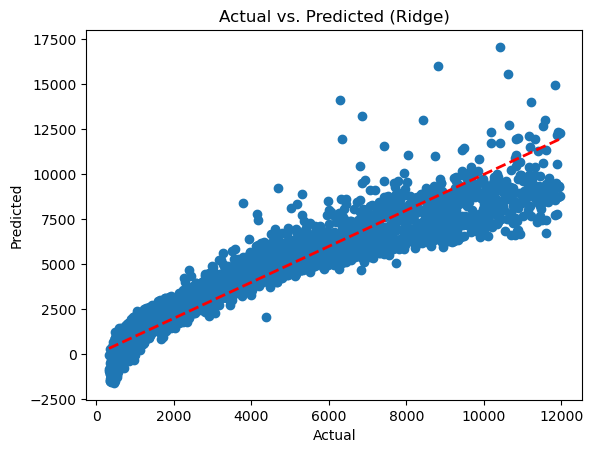

In [23]:
from sklearn.linear_model import Ridge
model2 = Ridge()
evaluate_and_plot_model(Ridge(),'Ridge', x_train_scaled, y_train, x_test_scaled, y_test)

### Lasso regression

Lasso Results:
Mean squared error: 744975.7509508283
Mean absolute error: 609.9893467525493
R-squared: 0.9032297066007932
Adjusted R-squared: 0.9031372803415771


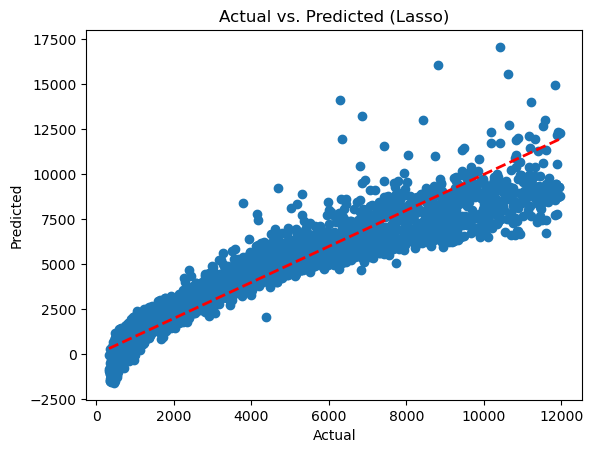

In [24]:
from sklearn.linear_model import Lasso
model3 = Lasso()
evaluate_and_plot_model(Lasso(),'Lasso', x_train_scaled, y_train, x_test_scaled, y_test)

### Elasticnet

ElasticNet Results:
Mean squared error: 1827559.9174538974
Mean absolute error: 963.7506507668045
R-squared: 0.7626050120545238
Adjusted R-squared: 0.7623782737661327


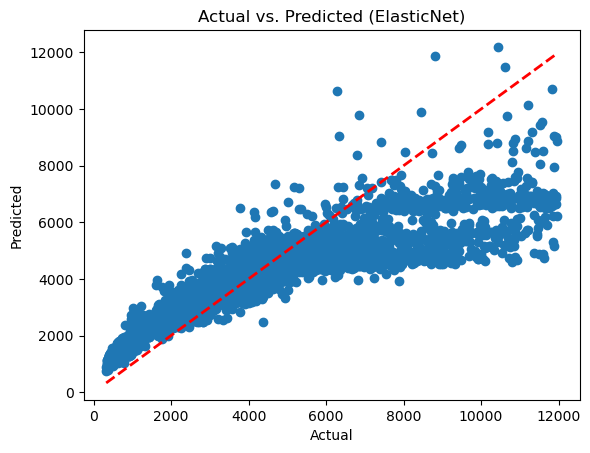

In [25]:
from sklearn.linear_model import ElasticNet
model3 = ElasticNet()
evaluate_and_plot_model(model3, 'ElasticNet', x_train_scaled, y_train, x_test_scaled, y_test)

### Decision Tree

DecisionTreeRegressor Results:
Mean squared error: 291076.32565679046
Mean absolute error: 300.44463878730056
R-squared: 0.9621899888695439
Adjusted R-squared: 0.9621538761559523


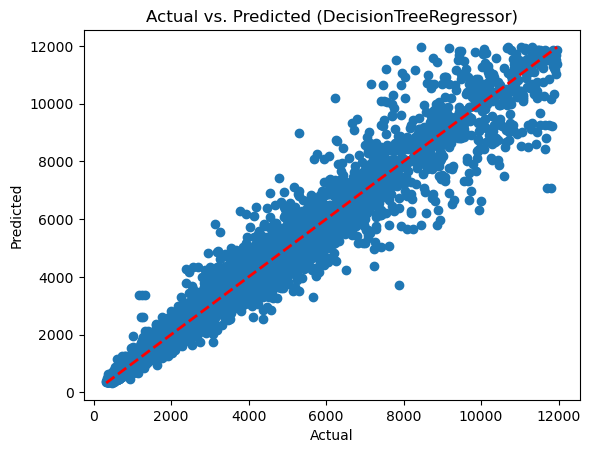

In [26]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor()
evaluate_and_plot_model(model4, 'DecisionTreeRegressor', x_train_scaled, y_train, x_test_scaled, y_test)

### Random forest.

RandomForestRegressor Results:
Mean squared error: 162001.79900024596
Mean absolute error: 230.0772053585626
R-squared: 0.978956413547093
Adjusted R-squared: 0.9789363146106528


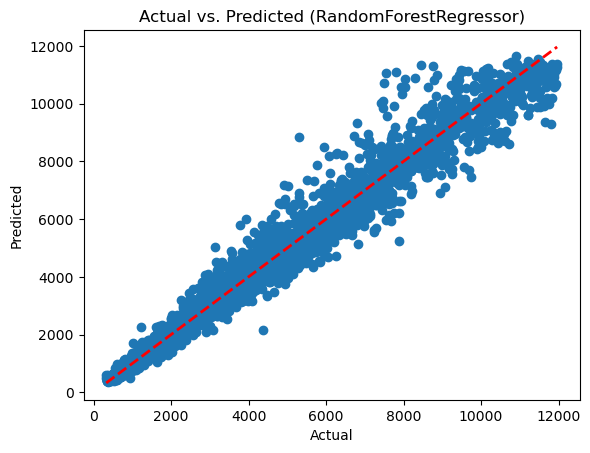

In [27]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor()
evaluate_and_plot_model(model5, 'RandomForestRegressor', x_train_scaled, y_train, x_test_scaled, y_test)

### AdaBoost Regressor

AdaBoostRegressor Results:
Mean squared error: 531454.1982526043
Mean absolute error: 530.0977648024875
R-squared: 0.9309655668288466
Adjusted R-squared: 0.9308996313625895


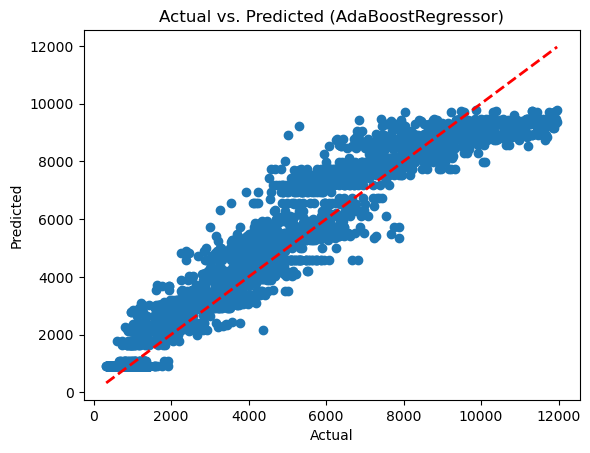

In [28]:
from sklearn.ensemble import AdaBoostRegressor
model6 = AdaBoostRegressor()
evaluate_and_plot_model(model6, 'AdaBoostRegressor', x_train_scaled, y_train, x_test_scaled, y_test)

### Gradient Boosting

GradientBoostingRegressor Results:
Mean squared error: 183284.77583355358
Mean absolute error: 257.59424486306597
R-squared: 0.9761918136122104
Adjusted R-squared: 0.9761690741791753


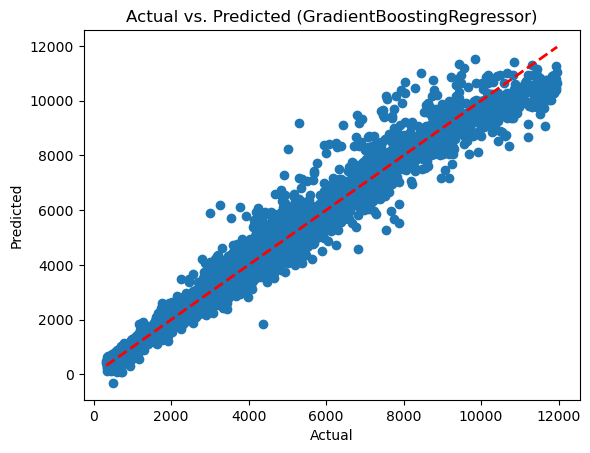

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
model7 = GradientBoostingRegressor()
evaluate_and_plot_model(model7, 'GradientBoostingRegressor', x_train_scaled, y_train, x_test_scaled, y_test)

## Model Evaluation

In [30]:
# Display all model results
for model_name, results in model_results.items():
    print(f'\nResults for {model_name}:')
    print('='*30)
    for metric, value in results.items():
        print(f'{metric}: {value}')


Results for LinearRegression:
Mean Squared Error: 745004.7886722399
Mean Absolute Error: 610.4969168247734
R-squared: 0.903225934680946
Adjusted R-squared: 0.9031335048191322

Results for Ridge:
Mean Squared Error: 745001.3794799516
Mean Absolute Error: 610.4632092874938
R-squared: 0.9032263775256125
Adjusted R-squared: 0.9031339480867641

Results for Lasso:
Mean Squared Error: 744975.7509508283
Mean Absolute Error: 609.9893467525493
R-squared: 0.9032297066007932
Adjusted R-squared: 0.9031372803415771

Results for ElasticNet:
Mean Squared Error: 1827559.9174538974
Mean Absolute Error: 963.7506507668045
R-squared: 0.7626050120545238
Adjusted R-squared: 0.7623782737661327

Results for DecisionTreeRegressor:
Mean Squared Error: 291076.32565679046
Mean Absolute Error: 300.44463878730056
R-squared: 0.9621899888695439
Adjusted R-squared: 0.9621538761559523

Results for RandomForestRegressor:
Mean Squared Error: 162001.79900024596
Mean Absolute Error: 230.0772053585626
R-squared: 0.978956413

- The Random Forest Regressor appears to be the best-performing model based on the lowest Mean Squared Error, Mean Absolute Error, and the highest R-squared and Adjusted R-squared values. It offers a good balance between prediction accuracy and complexity.